In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#read in the data using pandas
df = pd.read_csv('dataset.csv')
#check data has been read in properly
df

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True
...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False
1995,NaN,3.562990,NaN,2.499590,False
1996,4.059027,1.977436,2.144760,4.257220,False
1997,3.457310,3.962342,3.770837,3.243168,False


In [2]:
df.describe()

,feature_1,feature_2,feature_3,feature_4
count,1897.000000,1899.000000,1893.000000,1897.000000
mean,0.814404,1.795843,2.621096,0.807499
std,1.729538,1.605611,1.474973,1.768597
min,-2.285499,-7.363119,-5.363119,-3.006499
25%,-0.556433,0.975148,1.671905,-0.563357
50%,0.084789,1.881904,2.499623,0.021857
75%,2.270955,2.840511,3.470200,2.319822
max,5.929096,7.549658,9.549658,5.759355


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


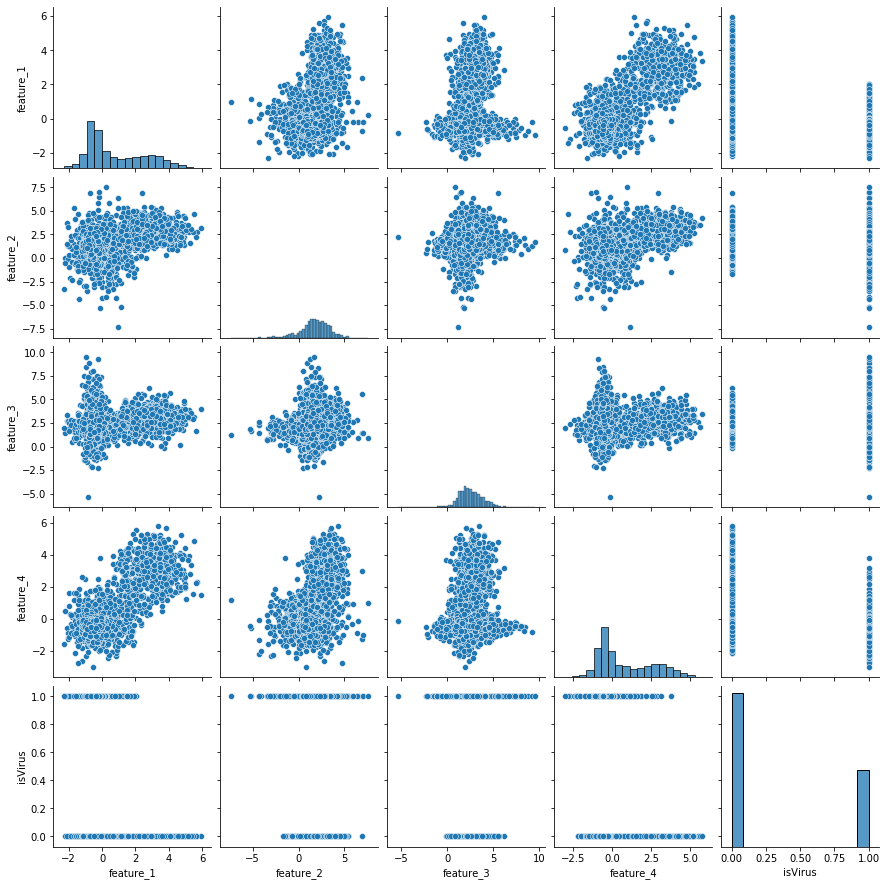

In [3]:
sns.pairplot(df)

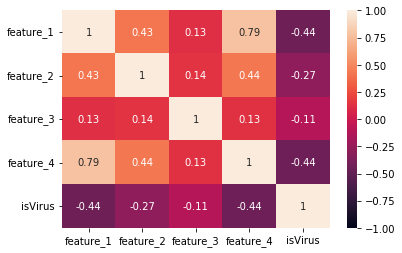

In [4]:
corr=df.corr()
sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)

In [5]:
print(df.isnull().sum())

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64


In [6]:
from sklearn.impute import KNNImputer

X = df.drop('isVirus', axis=1)
y = df['isVirus']

# initialize the KNN imputer
imputer = KNNImputer(n_neighbors=3)

# impute the missing values
X_imputed = imputer.fit_transform(X)

# combine the imputed features with the target variable
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)
df_imputed['isVirus'] = y

# check for missing values
print(df_imputed.isnull().sum())

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


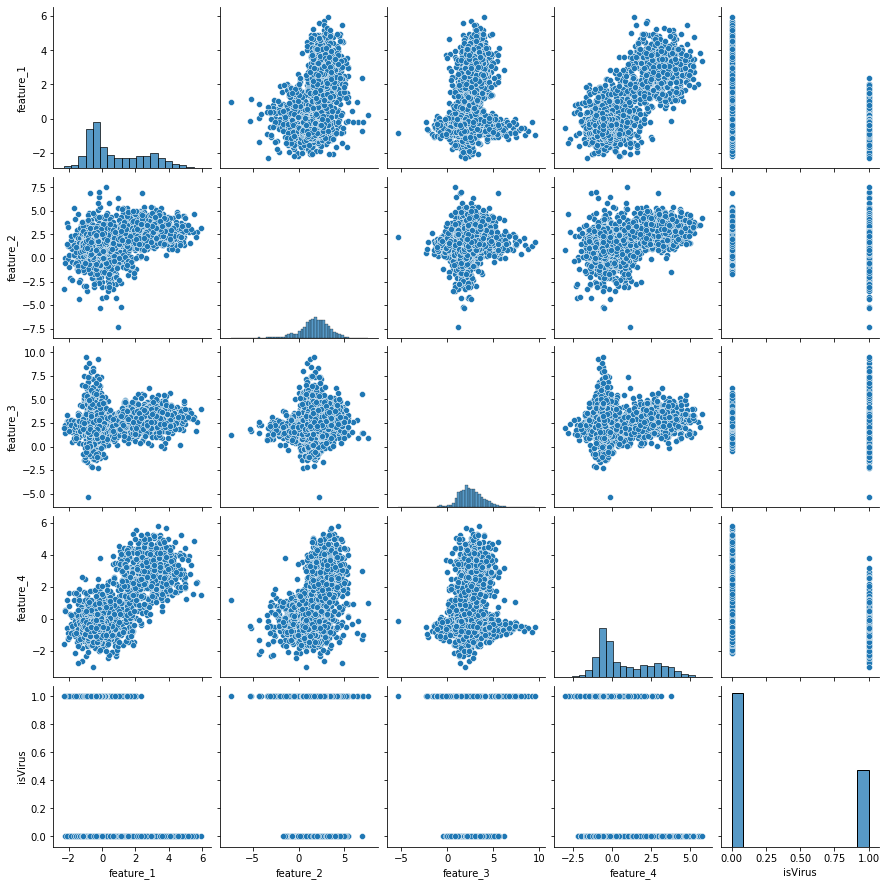

In [7]:
sns.pairplot(df_imputed)

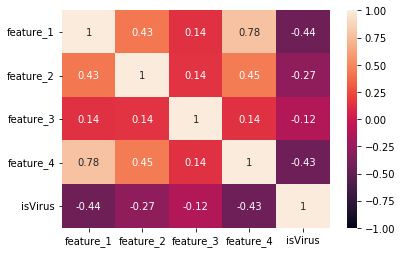

In [8]:
corr=df_imputed.corr()
sns.heatmap(df_imputed.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)

In [9]:
df = df_imputed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1999 non-null   float64
 1   feature_2  1999 non-null   float64
 2   feature_3  1999 non-null   float64
 3   feature_4  1999 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

target = "isVirus"

X, y = df.drop(columns=[target]), df[target]
clf = RandomForestClassifier(n_estimators=200)
cv  = KFold()

scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

In [22]:
print(f'Scores mean: {np.mean(scores):.4f}')
print(f'Scores std: {np.std(scores):.4f}')

Scores mean: 0.8685
Scores std: 0.0871


In [23]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = clf.predict(X)

comp=pd.DataFrame({'Actual':y, 'Predicted':predictions})
comp

,Actual,Predicted
0,False,False
1,False,False
2,False,False
3,False,False
4,True,True
...,...,...
1994,False,False
1995,False,False
1996,False,False
1997,False,False
